# Web Scraping and HTML Concepts


### Morning Objectives:
* Install `mongo` and `pymongo`.
* *Compare and Contrast* SQL and noSQL.
* *Perform* basic operations using Mongo.

### Afternoon Objectives:
* *Describe* a typical web scraping data pipeline.
* *Explain* the basic concepts of HTML.
* *Learn how to* write code to pull elements from a web page using BeautifulSoup.
* *Use* an existing API to fetch data and parse using BeautifulSoup.

## Resources

* [Precourse-Web Awareness](https://github.com/zipfian/precourse/tree/master/Chapter_8_Web_Awareness)
* [The Little MongoDB Book](http://openmymind.net/mongodb.pdf)
* [w3 schools](http://www.w3schools.com/) : HTML tags and thier attributes.
* [PyMongo tutorial](http://api.mongodb.org/python/current/tutorial.html)
* [BeautifulSoup Documentation](http://www.crummy.com/software/BeautifulSoup/bs4/doc/)
* [Scrape anonymously with Tor](https://deshmukhsuraj.wordpress.com/2015/03/08/anonymous-web-scraping-using-python-and-tor/)

## Installing Mongo and PyMongo

### Mongo
1. Install MongoDB: `brew install mongodb`
2. Start MongoDB: `brew services start mongodb`

#### Do *not* run services as `root`.  Ever.  Even if someone tells you to.

### PyMongo
2. Install PyMongo: `conda install pymongo`

### SQL vs NoSQL

NoSQL does not stand for 'No SQL'. SQL is useful for many things, it's not going away.

> NoSQL ==> "Not Only SQL"

It's a different Paradigm to deal with messy data that does not lend itself to an RDBMS.  It's also very useful as a quick and painless solution to data storage, where a full relational database model takes much thought and investment.


| Topic | SQL | NoSQL |
| --- | --- | --- |
| Database | Database (Schema for Oracle) | Database |
| Table | Table | Collection |
| Column | Columns | Document keys |

**Not neccessary for NoSQL to have the same keys for each document in a collection -- whaaaaat?!

Today we're talking about Mongo, but here is a high level overview of the Not Only SQL space

<img src="images/noSQL.png" width = 500>

### Mongo Clients

The command line program we use to interact with mongo is a *client*.  It's only job is to send messages to another program, a *server*, which holds all our data and knows how to operate on it.

The command line Mongo client is written in javascript, so interacting with mongo with this client looks like writing javascript code.

<img src="images/client-server.png" width = 500>

There are other clients.  Later on we will use `pymongo` to interact with our databases from python.

## Javascript Object Notation

Javascript Object Notation, or JSON, is a simple data storage and communication protocall.  It was designed by [Douglas Crockford](https://en.wikipedia.org/wiki/Douglas_Crockford) based on the notation Javascipt uses for objects.

It is meant as a replacement to XML.

```javascript
{
    name: 'TwilightSparkle',
    friends: ['Applejack', 'Fluttershy'],
    age: 16,
    gender: 'f',
    wings: true,
    horn: true,
    residence: {
        town: 'Ponyville',
        address: '15 Gandolfini Lane'}
}
```

It is very similar to a python dictionary literal, but you *cannot use double quotes to enclose strings*.

## Working with Mongo DB

### MongoDB Concepts

#### What's it about? 

* MongoDB is a document-oriented database, an alternative to RDBMS, used for storing semi-structured data.
* JSON-like objects form the data model, rather than RDBMS tables.
* No schema, No joins, No transactions.
* Sub-optimal for complicated queries.

#### Structure of the database.

* MongoDB is made up of databases which contain collections (tables).
* A collection is made up of documents (analogous to rows or records).
* Each document is a JSON object made up of key-value pairs (analogous to columns).


So a RDBMS defines columns at the table level, document oriented database defines its fields at a document level.

Now start mongo. 

A MongoDB contains a collection of databases, so lets check that the `unicorns` database exists.

### Inserting Data
use unicorns

```javascript
db.unicorns.insert({
    name: 'Applejack',
    age: 15,
    friends: ['TwilightSparkle', 'Fluttershy'],
    wings: false,
    horn: false
})

db.unicorns.insert({
    name: 'Fluttershy',
    age: 15,
    friends: ['Applejack', 'TwilightSparkle'],
    wings: true,
    horn: false
})
                 
```

Run the following command 
```
> show dbs
```

To use the `unicorns` database, we simply do the following:

```
> use unicorns
```

A database is made of `collection`s, which are containers for the actual stored data.  A `collection` would be analagous to a `table` in a classical relational database, but can contain much more flexible data than a table.

```
> db.getCollectionNames()
```

## Querying Data

Without any arguments, `find` dumps all the data in the collection. This is like the SQL where clause. 

```javascript
db.unicorns.find()
```

`find` is much more flexible.

```javascript
// find by single field
db.unicorns.find({name: 'TwilightSparkle'})

// find by presence of field
db.unicorns.find({friends: {$exists : true}})

// find by value in array
db.unicorns.find({friends: 'TwilightSparkle'})

// To return only certain fields
// This says, return only the names of unicorns who are friends with
// twilight sparkle.
db.unicorns.find({friends: 'TwilightSparkle'}, {name: true})

Above the first dictionary is called a selector (makes sense) and the second is a projection. 

Chaining criteria together above is like using AND in SQL you would use OR using the syntax below


db.unicorns.find({gender: 'f', $or: [{loves: 'apple'}, {weight: {$lt: 500}}]})

**Excercises**: 

<details><summary>
Q: Find all the unicorns with wings.
</summary>
db.unicorns.find({'winds':true})
</details>

<details><summary>
Q: Find only the friends of unicorns with wings
</summary>
db.unicorns.find({'wings':true}, {'friends':true, _id:false})
</details>

<details><summary>
Q: Return only those with friends (no blank arrays)
</summary>
db.unicorns.find({'wings':true, friends:{$ne:[]}}, {'friends':true, name:true, _id:false})
</details>


## Updating Data

```javascript
// Replaces friends array
db.unicorns.update({
    name: 'TwilightSparkle'}, {
    $set: {
        friends: ['Shutterfly', 'Rarity', 'Applejack']}})

// Adds to friends array
db.unicorns.update({
    name: 'Applejack'}, {
    $push: {
        friends: 'Rarity'}})
```

We have to use the `$set` and `$push` operators, the default behaviour of `update` is to *replace the data*.

```javascript
// Replaces the TwighlightSparkle data completely!
// It will no longer have even a name field after this!
db.unicorns.update({
    name: 'TwilightSparkle'}, {
    friends: ['Shutterfly', 'Rarity', 'Applejack']})
```


An `upsert` either creates a document (when it does not already exist) or inserts into an existing document.

```
// Upsert: This one is created
db.unicorns.update({
    name: "Rarity"}, {
    $push: {
        friends: {
            $each: ["TwilightSparkle", "Applejack", "Fluttershy"]}}}, {
    upsert: true})

// Upsert: This one is updated
db.unicorns.update({
    name: "Fluttershy"}, {
    $push: {
        friends: {
            $each: ["Rarity", "PrincessCelestia"]}}}, {
    upsert: true})
```

**Excercise**: Enter a unicorn named RainbowDash into the database that is friends with TwilightSparkle, Rarity, and Applejack.

## Deleting Data

*Don't run this one!*

```javascript
db.unicorns.remove({})
```

## PyMongo


`pymongo` allows python to connect to and manipulate MongoDB.

In [3]:
from pymongo import MongoClient
import pprint

In [4]:
# Connect to the hosted MongoDB instance
client = MongoClient('mongodb://localhost:27017/')

In [5]:
db = client.unicorns

In [6]:
# Create a collection called unicorn
unicorns = db.unicorns

In [7]:
unicorns.insert_one({
    'name': 'RainbowDash', 
    'age': 16, 
    'friends': ['TwilightSparkle', 'Applejack', 'Rarity']})

In [8]:
unicorns.find().count()

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: DeprecationWarning: count is deprecated. Use Collection.count_documents instead.
  """Entry point for launching an IPython kernel.


1

In [9]:
print(unicorns.find_one())

{u'name': u'TwilightSparkle', u'gender': u'f', u'age': 16, u'horn': True, u'residence': {u'town': u'Ponyville', u'address': u'15 Gandolfini Lane'}, u'_id': ObjectId('598cf4506ac6234d87c88cf1'), u'friends': [u'Applejack', u'Fluttershy'], u'wings': True}


In [10]:
rarity = unicorns.find_one({'name': 'Rarity'})
pprint.pprint(rarity)

{u'_id': ObjectId('5992063c4d7fa4644596e950'),
 u'friends': [u'TwilightSparkle', u'Applejack', u'Fluttershy'],
 u'name': u'Rarity'}


The same selector strategies can be used for more complex queries in `pymongo`

In [11]:
friend_of_twilight = unicorns.find_one({'friends': 'TwilightSparkle'})
pprint.pprint(friend_of_twilight)

{u'_id': ObjectId('598cf4506ac6234d87c88cf2'),
 u'age': 34,
 u'friends': [u'TwilightSparkle'],
 u'horn': True,
 u'name': u'PrincessCelestia',
 u'wings': True}


To get multiple results back, use `find`, which returns an iterator.

In [12]:
friends_of_twilight = unicorns.find({'friends': 'TwilightSparkle'})
for friend in friends_of_twilight:
    pprint.pprint(friend)

{u'_id': ObjectId('598cf4506ac6234d87c88cf2'),
 u'age': 34,
 u'friends': [u'TwilightSparkle'],
 u'horn': True,
 u'name': u'PrincessCelestia',
 u'wings': True}
{u'_id': ObjectId('598cf4b89f41cd237793876a'),
 u'age': 15.0,
 u'friends': [u'TwilightSparkle', u'Fluttershy'],
 u'horn': False,
 u'name': u'Applejack',
 u'wings': False}
{u'_id': ObjectId('598cf4c19f41cd237793876b'),
 u'age': 15.0,
 u'friends': [u'Applejack', u'TwilightSparkle'],
 u'horn': False,
 u'name': u'Fluttershy',
 u'wings': True}
{u'_id': ObjectId('598e1eb0c64e701ec1c26625'),
 u'age': 16,
 u'friends': [u'TwilightSparkle', u'Applejack', u'Rarity'],
 u'name': u'RainbowDash'}
{u'_id': ObjectId('5992063c4d7fa4644596e950'),
 u'friends': [u'TwilightSparkle', u'Applejack', u'Fluttershy'],
 u'name': u'Rarity'}
{u'_id': ObjectId('5a20358ddbc88be0fef1783c'),
 u'age': 15.0,
 u'friends': [u'TwilightSparkle', u'Fluttershy'],
 u'horn': False,
 u'name': u'Applejack',
 u'wings': False}
{u'_id': ObjectId('5a2038e5c64e7042ef8fd352'),
 u'a

In [13]:
young_unicorns = unicorns.find({'age': {'$lt': 16}})
for unicorn in young_unicorns[:2]:
    pprint.pprint(unicorn)

{u'_id': ObjectId('598cf4b89f41cd237793876a'),
 u'age': 15.0,
 u'friends': [u'TwilightSparkle', u'Fluttershy'],
 u'horn': False,
 u'name': u'Applejack',
 u'wings': False}
{u'_id': ObjectId('598cf4c19f41cd237793876b'),
 u'age': 15.0,
 u'friends': [u'Applejack', u'TwilightSparkle'],
 u'horn': False,
 u'name': u'Fluttershy',
 u'wings': True}


**Exercise:** Find all the unicorns that have a horn and wings.

In [ ]:
unicorns.find({})

In [ ]:
young_unicorns = unicorns.find({'age': {'$lt': 16}})

### Aggregations are not something you will do a ton of while working in Mongo, but here is an example

In [14]:
popular_unicorns = unicorns.aggregate(
[
 {'$project': {
    'name': 1,
    'numberOfFriends': { 
        '$size': "$friends" 
                        }
               }
 }
])

In [15]:
for row in popular_unicorns:
    print(row)

{u'numberOfFriends': 2, u'_id': ObjectId('598cf4506ac6234d87c88cf1'), u'name': u'TwilightSparkle'}
{u'numberOfFriends': 1, u'_id': ObjectId('598cf4506ac6234d87c88cf2'), u'name': u'PrincessCelestia'}
{u'numberOfFriends': 0, u'_id': ObjectId('598cf4506ac6234d87c88cf3'), u'name': u'Nightmare Moon'}
{u'numberOfFriends': 2, u'_id': ObjectId('598cf4b89f41cd237793876a'), u'name': u'Applejack'}
{u'numberOfFriends': 2, u'_id': ObjectId('598cf4c19f41cd237793876b'), u'name': u'Fluttershy'}
{u'numberOfFriends': 3, u'_id': ObjectId('598e1eb0c64e701ec1c26625'), u'name': u'RainbowDash'}
{u'numberOfFriends': 3, u'_id': ObjectId('5992063c4d7fa4644596e950'), u'name': u'Rarity'}
{u'numberOfFriends': 2, u'_id': ObjectId('5a20358ddbc88be0fef1783c'), u'name': u'Applejack'}
{u'numberOfFriends': 3, u'_id': ObjectId('5a2038e5c64e7042ef8fd352'), u'name': u'RainbowDash'}


# Afternoon: Web Scraping using requests and BeautifulSoup

## HTML Concepts

**H**yper**T**ext **M**arkup **L**anguage

A *markup language* (think markdown) that forms the building blocks of all websites.  Controls what to say and where to say it, along with some semantic meaning (this is a section, this is a list, this part is emphasised).

Consists of tags enclosed in angle brackets (like `<html>`)

A minimal HTML document, unfortuantely, contains a lot of cruft.  Here's one I got from [https://www.sitepoint.com/a-minimal-html-document/](https://www.sitepoint.com/a-minimal-html-document/).


```html
<!DOCTYPE html PUBLIC "-//W3C//DTD HTML 4.01//EN"
    "http://www.w3.org/TR/html4/strict.dtd">
<html lang="en">
  <head>
  
    <meta http-equiv="content-type" content="text/html; charset=utf-8">
    <title>title</title>
    <link rel="stylesheet" type="text/css" href="style.css">
    <script type="text/javascript" src="script.js"></script>
  </head>
  <body>
		
  </body>
</html>
```

The `<link>` and `<script>` tags are not strictly necessary, but will appear in more or less every HTML document.

* The `<link>` tag points to a **stylesheet**, which controls who different parts of the docuemnt are rendered in the browser.  This makes things pretty.
* The `<script>` tag points to a **javascript** program.  This allows programmers to add *dynamic behaviour* to a html document.
* The `<body>` tag contains the guts of your document.

### Important Tags

```html
<div>Defines a division or section of the docuemnt.</div>
<a href="http://www.w3schools.com">A Gyperlink to W3Schools.com!</a>

<h1>This is a header!</h1>

<p>This is a paragraph!</p>

<h2>This is a Subheading!</h2>

<table>
  This is a table!
  <tr>
    <td>An entry in the first row.</td>
    
    <td>Another entry in the first row.</td>
  </tr>
  <tr>
    <td>An entry in the second row.</td>
    <td>Another entry in the second row.</td>
  </tr>
</table>

<ul>
  This is a list!
  <li>This is the first thing in the list!</li>
  <li>This is the second thing in the list!</li>
</ul>
```

I saved the HTML document described above as `basic.html`.

## Web vs Internet

The web or www or (World Wide Web), is different from Internet.  You can think of the web as collection of islands and internet as bridges connecting the islands.

I.e. the web is a collection of *content* and the internet is the *infastructure for accessing and distributing* this content.

HTTP is the language of the Web.  Data on the web is distributed as HTTP documents.

## HTTP Requests

To get data from the web, you need to make a HTTP request.  The two most important request types are:

* GET (queries data, no data is *sent*)
* POST (updates data, *data must be sent*)

`curl` is a command line program for sending HTTP requests.  It's easy to send a `GET` request to a url.

<!DOCTYPE html>
<html>
  <head>
    <meta http-equiv="Content-type" content="text/html; charset=utf-8">
    <meta http-equiv="Content-Security-Policy" content="default-src 'none'; base-uri 'self'; connect-src 'self'; form-action 'self'; img-src 'self' data:; script-src 'self'; style-src 'unsafe-inline'">
    <meta content="origin" name="referrer">
    <title>Page not found &middot; GitHub</title>
    <style type="text/css" media="screen">
      body {
        background-color: #f1f1f1;
        margin: 0;
      }
      body,
      input,
      button {
        font-family: "Helvetica Neue", Helvetica, Arial, sans-serif;
      }
      .container { margin: 30px auto 40px auto; width: 800px; text-align: center; }

      a { color: #4183c4; text-decoration: none; font-weight: bold; }
      a:hover { text-decoration: underline; }

      h3 { color: #666; }
      ul { list-style: none; padding: 25px 0; }
      li {
        display: inline;
        margin: 10px 50px 10px 0px;
      }
      inp

        src="

GhNK6K0Yy0ToVVGrmf8AJ+3zUBF1CXIuLqhgXJYMRTSDRQABgwDu86eSoLMxrzvsgYCej+agUwXJ0Ymk8qgACA4JMGdp+KBssSNH8t1IGyLQH60SDChoxp00DICTowMT8FAAKzq8RXog0QRqdPYIMAD8wcZPBG9UB2LPsDugLGLqHUIMGA+URuKboF/Mzh3h990BtB5Y9imRiAWB/hn7EAJalIfqN2QEkEggiH1QAmTUkUd+3FUBnQVPQd0A1BJDk09mQGdiTSfegABIo13s+nwQYOzsa0130QYORc/zA0OjICwJ+ZwQ7z8UGL6FoqgBud+KDy5QAHIhjAeW16qh5tGzmBTsoMSwDjkBApu/MSTDEtp0KA/M5aAK8e9AA7sXHPU8boCCdQSaA6x9qAECT/CYbRAHB+UyYZ9e6o1vzOD8suBrKBi4LGXoGqygBctMgtaXZz2QEksCNNYQbJxFAWYhIMBNpLkjX3oAasZP8Q08UBIDyeQCHhBuMXtO0oBN0AgjxQF67SzFkG5kP9roAZbfSNW5EICSAa11hAAHj5WeNw2/RBtw4/ym2lAXucEMAIPXyQapIYhxIqgF2xq2zpgYEEyBIhtlRhcDT/ja9lIFFw0Alzl3furBmMPJq7IM/Dvp0NEAeh/NsX1VG5brb0QDn+E19mQG4OQ12LFMDE0AJPM12dQKXuh2HmqFAdhOOr790AItrUdkGBJFrOdz+KmUrEvaXDlnIQKS3zCZEoAA5BedBsFQjiJFdD7kALuGoHcoJm6QAWGvLIEJihAGnsVRMuLiHrTdEKSBHiTsdHRUSQ9QQIA6IhSW6DbhBI3czugiSGMxLaKiF1zmAY3VErjo5eRoiZc9xZ20lUc9xBMU4VwOe403VRzXkS3cboiLz5qjgtOnRBey4kbEVGio67LmjusjotILEDpsouHRbdXnyQdNtwiXGiiuiw9Nn2UFQ3jBSqvaQwO2/vUFgQ0CnhCC1hatApVO4/hlyA9U

bNydkQR6gkx4hUAlpM+dEByDwEBBFXbsoMDk4neY9mVGe0EOWfdBnDSYKAns4KgM0oSae9BnLs51CowOx4IUGfTTRAAS0nnsqGc7vqe6ig5aoLOgORk02BhEDKPtH2qjZHQnpqoM8tl2HiyAFyK1q6o2RpRy9ZGiAvMzIUGLy0ooOCdy6IxL7dEArQgDaqoJNoc8zCgBIlj2Z0o2Qq8VlVWyFsmC6iBbcIoH0TIGZr4KjH1GMmqgUXVkH8KxuqpTeHgjlyiNk3V3dAM7mu9zV3QKbyCJbg68oBnq4A38lQDdzAQDKhpEqBchGWgqFQn1DUxLT5IBdcBqw4p0QLkYYdRxoqA9xl24U5ApuYkmay+yqUuZrR6bRygX6ndygX6jO6BDcakoEy2LkVVCZPwzONECG+h1ogS664irKoQ3aHs23ZAh9SfeURM+oW5VEjeAKwPwQTuvLxu5LoJG+u5VCG6ZPmgmb/NBG6/bsNFRG71D2nugkb0ETc3DhVEbrw/IVRG655Mkaq8wjf6nkmBC66JVRG69kgjdeqJZoOK25EWFwKiqW3FUWtuCgvbfypBa24aFBW29vcoq9t4+5Ba29meikFrbtB3UVUXCJdCqi6NkVW2+kzsoKi/Sr6aIKi+mu6gcXMILIKC7qx2QUF7wCgoLwQON1BQeoNIoSkDi9wzOygpkH6/BFNbc+rEmUDZkPXcsgceoQz9winF4NWflQPlSfsCAi6rVOn3FA4vAGg26KQPlViYCBxcDp+KgOQHQGSgL1Y61VqmN/Nd1CiLoZ+u6BhdXyCA5liGqgYX8t0QNnIrwSigLhL1FSEQ2TwY2lAchR2N0FARe7Tq6gOYoQJ0KQFyQzQZqimF79tUgGe1ddUgJ9Rm2SDZgzrPTukQRedex9nRRyAL6DpyoCbyRNCzQgw9RueIqg2T6SDRVBzIcuGMeCigLwXL9w9FUH6jksYCK2etEGy3rp+CIJvFY4UUBfAdnpsqjZM+rBBjc

        src="">

        

        <img alt="" class="js-plaxify" data-xrange="10" data-yrange="10" height="156" id="parallax_speeder" width="440"

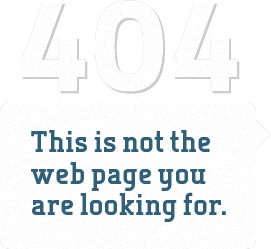
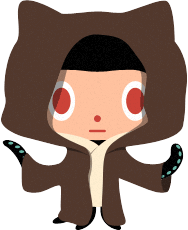

        src="">

        <img alt="" class="js-plaxify" data-xrange="10" data-yrange="10" height="49" id="parallax_octocatshadow" width="166"

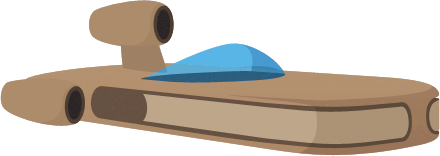

        src="">

        

        <img alt="" class="js-plaxify" data-invert="true" data-xrange="50" data-yrange="20" height="123" id="parallax_building_1" width="304"

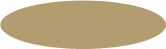
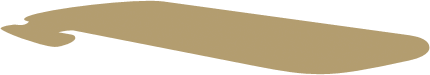

        src="">

        <img alt="" class="js-plaxify" data-invert="true" data-xrange="75" data-yrange="30" height="50" id="parallax_building_2" width="116"
        src="">
      </div>

    </div>

    <div class="container">
      <form accept-charset="UTF-8" id="search" action="/search" method="get">
        <label for="search">Find code, projects, and people on GitHub:</label>
        <input type="text" name="q">

        <input class="btn" type="submit" value="Search">
      </form>

      <div id="suggestions">
        <a href="https://github.com/contact">Contact Support</a> &mdash;
        <a href="https://status.github.com">GitHub Status</a> &mdash;
        <a href="https://twitter.com/githubstatus">@githubstatus</a>
      </div>

      <a href="/" class="logo logo-img-1x">
        
      </a>

      <a href="/" class="logo logo-img-2x">
        
      </a>
    </div>

    <script type="text/javascript" src="/_error.js"></script>
  </body>
</html>

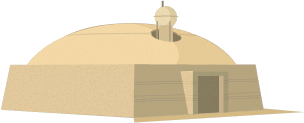
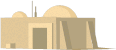
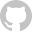
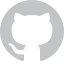

In [15]:
!curl https://github.com/gSchool/dsi-web-scraping/blob/master/individual.md

## Scraping

Web Scraping is the process of programatically getting data from the web.

<img src="images/pipeline.png" width = 500>

### Example: Load table into a data frame.

Lets load the Super Metroid speedrun leaderboards at [Deer Tier](http://deertier.com/Leaderboard/AnyPercentRealTime) into a Mongo database, and then load this database into a pandas data frame.

In [16]:
import warnings
warnings.filterwarnings('ignore')

In [17]:
import copy
import pandas as pd

# Requests sends and recieves HTTP requests.
import requests

# Beautiful Soup parses HTML documents in python.
from bs4 import BeautifulSoup

#### Step 1: Check out the website in a browser.

The first step is to check out the website in a browser.

Open the `Developer Tools` to get a useful display of the hypertext we will be working with.

The table we will need is inside a `<div>` with `class=scoreTable`.  Looking closely the structure is like this:

```
<div class=scoreTable>
  <table>
    <tr>..</tr>
    ...
    <tr>...</tr>
  </table>
</div>
```

Each row has a `title` attribute that contains some interesting data:

```
<tr title="Submitted by Oatsngoats on: 19/10/2016">
```

Inside each row, the columns have the following data:

```
rank, player, time, video url, comment
```

This should be enough infomation for us to get to scraping.

#### Step 2: Send a GET request for the data.

In [18]:
deer_tier_url = 'http://deertier.com/Leaderboard/AnyPercentRealTime'
r = requests.get(deer_tier_url)

A status code of `200` means that everything went well.

In [19]:
r.status_code

200

We can check out the raw hypertext in the `content` attribute of the request.

In [26]:
r.content

'<!DOCTYPE html PUBLIC "-//W3C//DTD XHTML 1.0 Transitional//EN" "http://www.w3.org/TR/xhtml1/DTD/xhtml1-transitional.dtd">\r\n\r\n<html xmlns="http://www.w3.org/1999/xhtml">\r\n<head runat="server">\r\n    \r\n    <link rel="apple-touch-icon" sizes="180x180" href="/apple-touch-icon.png" />\r\n    <link rel="icon" type="image/png" href="/favicon-32x32.png" sizes="32x32" />\r\n    <link rel="icon" type="image/png" href="/favicon-16x16.png" sizes="16x16" />\r\n    <link rel="manifest" href="/manifest.json" />\r\n    <link rel="mask-icon" href="/safari-pinned-tab.svg" color="#fec200" />\r\n    <meta name="apple-mobile-web-app-title" content="Deer Tier" />\r\n    <meta name="application-name" content="Deer Tier" />\r\n    <meta name="theme-color" content="#331f52" />\r\n    <meta name="viewport" content="width=device-width" />\r\n\r\n    <link href="/CSS/Reset.css" rel="Stylesheet" type="text/css" />\r\n    <link href="/CSS/font-awesome.min.css" rel="Stylesheet" type="text/css"  />\r\n    <

#### Step 3: Save all the hypertext into mongo for later use.

In [27]:
client = MongoClient('mongodb://localhost:27017/')
db = client.metroid
pages = db.pages

pages.insert_one({'html': r.content})

#### Step 4: Parse the hypertext with BeautifulSoup.

This is the beautiful part of the soup.  Parsing the HTML into a python object is effortless.

In [21]:
soup = BeautifulSoup(r.content, "lxml")

In [29]:
print(soup.prettify())

<!DOCTYPE html PUBLIC "-//W3C//DTD XHTML 1.0 Transitional//EN" "http://www.w3.org/TR/xhtml1/DTD/xhtml1-transitional.dtd">
<html xmlns="http://www.w3.org/1999/xhtml">
 <head runat="server">
  <link href="/apple-touch-icon.png" rel="apple-touch-icon" sizes="180x180"/>
  <link href="/favicon-32x32.png" rel="icon" sizes="32x32" type="image/png"/>
  <link href="/favicon-16x16.png" rel="icon" sizes="16x16" type="image/png"/>
  <link href="/manifest.json" rel="manifest"/>
  <link color="#fec200" href="/safari-pinned-tab.svg" rel="mask-icon"/>
  <meta content="Deer Tier" name="apple-mobile-web-app-title"/>
  <meta content="Deer Tier" name="application-name"/>
  <meta content="#331f52" name="theme-color"/>
  <meta content="width=device-width" name="viewport"/>
  <link href="/CSS/Reset.css" rel="Stylesheet" type="text/css"/>
  <link href="/CSS/font-awesome.min.css" rel="Stylesheet" type="text/css"/>
  <link href="/CSS/Styles.css?v=21" rel="Stylesheet" type="text/css"/>
  <script src="/Scripts/jq

In [30]:
print soup.title

<title>Any% Real Time - Deer Tier</title>


#### Step 5: Navigate the data to pull out the table information.

Recall the structure of the table we are looking for:

```
<div class=scoreTable>
  <table>
    <tr>..</tr>
    ...
    <tr>...</tr>
  </table>
</div>
```

In [22]:
div = soup.find("div", {"class": "scoreTable"})
table = div.find("table")

# This returns an iterator over the rows in the table.
rows = table.find_all("tr")

all_rows = []

# Let's store each row as a dictionary 
empty_row = {
    "rank": None, "player": None, "time": None, "comment": None
}

# The first row contains header information, so we are skipping it.
for row in rows[1:]:
    new_row = copy.copy(empty_row)
    # A list of all the entries in the row.
    columns = row.find_all("td")
    new_row['rank'] = int(columns[0].text.strip())
    new_row['player'] = columns[1].text.strip()
    new_row['time'] = columns[2].text.strip()
    new_row['comment'] = columns[4].text.strip()
    all_rows.append(new_row)    

In [23]:
pprint.pprint(all_rows[:4])

[{'comment': 'Would just like to thank MB...',
  'player': 'Behemoth',
  'rank': 1,
  'time': '41:18'},
 {'comment': 'scoops', 'player': 'zoast', 'rank': 2, 'time': '41:19'},
 {'comment': 'Mole%', 'player': 'Oatsngoats', 'rank': 3, 'time': '41:56'},
 {'comment': "it's about time",
  'player': 'Overfiendvip',
  'rank': 4,
  'time': '42:17'}]


#### Step 6: Load all the rows into a Mongo database.

Since we collected all the rows into python dictionaries, this is easy.

In [34]:
db = client.metroid

In [35]:
deer_tier = db.deer_tier

In [36]:
for row in all_rows:
    deer_tier.insert_one(row)

Now we can check from the command line that the data is really in there!

#### Step 7: Load all the rows into a pandas dataframe.

Even though there is no real reason to, let's load all the rows from the Mongo database just to give a more thorough example of how you can go about things.

In [37]:
rows = deer_tier.find()
super_metroid_times = pd.DataFrame(list(rows))

In [38]:
super_metroid_times.head()

,_id,comment,player,rank,time
0,5a206ab0c64e7042ef8fd358,Just breathe,Behemoth,1,41:33
1,5a206ab0c64e7042ef8fd359,guitar% WR,zoast,2,41:42
2,5a206ab0c64e7042ef8fd35a,Mole%,Oatsngoats,3,41:56
3,5a206ab0c64e7042ef8fd35b,Goofy quarter halfie.,kottpower,4,42:20
4,5a206ab0c64e7042ef8fd35c,choke artist,Twocat,5,42:29


In [ ]:
super_metroid_times = super_metroid_times.drop("_id", axis=1)
super_metroid_times = super_metroid_times.set_index("rank")
super_metroid_times.head()

Goal Achieved!

## Using Selenium for client side rendering

Sometimes you will request a page and it will not look like HTML, because it's not! It is javascript, so we need to use a tool called Selenium to render the HTML and then scrape it. 

`conda install selenium`

In [24]:
from selenium import webdriver 
from selenium.webdriver.common.by import By 
from selenium.webdriver.support.ui import WebDriverWait 
from selenium.webdriver.support import expected_conditions as EC 
from selenium.cxommon.exceptions import TimeoutException

option = webdriver.ChromeOptions()
option.add_argument(" — incognito")

browser = webdriver.Chrome(executable_path='/usr/local/bin/chromedriver', chrome_options=option)

browser.get("https://en.wikipedia.org/wiki/List_of_U.S._states_by_educational_attainment")

soup = BeautifulSoup(browser.page_source, 'html')

In [31]:
tab = soup.find('table', {"class": "wikitable sortable"})

In [34]:
rows = tab.find_all("tr")

all_rows = []

empty_row = {
    "state": None, 
    "HS": None, 
    "BS_rank": None, 
    "BS": None, 
    "HS_rank": None,
    "ADV": None, 
    "ADV_rank": None
}

rows = tab.find_all('tr')

all_rows = []

for row in rows[1:]:
    new_row = copy.copy(empty_row)
    # A list of all the entries in the row.
    try:
        columns = row.find_all("td")
        new_row['state'] = columns[0].text.strip()
        new_row['HS'] = columns[1].text.strip()
        new_row['HS_rank'] = columns[2].text.strip()
        new_row['BS'] = columns[3].text.strip()
        new_row['BS_rank'] = columns[4].text.strip()
        new_row['ADV'] = columns[5].text.strip()
        new_row['ADV_rank'] = columns[5].text.strip()
        all_rows.append(new_row)  
    except (IndexError, KeyError) as e:
        print(row)

<tr>
<td><a href="/wiki/Puerto_Rico" title="Puerto Rico">Puerto Rico</a></td>
<td>73.0%</td>
<td>
</td></tr>



<details><summary>
Q: **Large-ish Exercise**: Scrape the wikipedia page for education by state into a dataframe.?
</summary>
```
    
[page](https://en.wikipedia.org/wiki/List_of_U.S._states_by_educational_attainment)

tab = soup.findAll('table', {"class": "wikitable sortable jquery-tablesorter"})

#All of these below are equivalent for searching
tab = soup.find("table", class_='wikitable sortable jquery-tablesorter')
#tab = soup.find("table", {"class":'wikitable sortable jquery-tablesorter'})

# This returns an iterator over the rows in the table.
rows = tab.find_all("tr")

all_rows = []

empty_row = {
    "state": None, 
    "HS": None, 
    "BS_rank": None, 
    "BS": None, 
    "HS_rank": None,
    "ADV": None, 
    "ADV_rank": None
}

rows = tab.find_all('tr')

all_rows = []

for row in rows[1:]:
    print(row)
    new_row = copy.copy(empty_row)
    # A list of all the entries in the row.
    columns = row.find_all("td")
    new_row['state'] = columns[0].text.strip()
    new_row['HS'] = columns[1].text.strip()
    new_row['HS_rank'] = columns[2].text.strip()
    new_row['BS'] = columns[3].text.strip()
    new_row['BS_rank'] = columns[4].text.strip()
    new_row['ADV'] = columns[5].text.strip()
    new_row['ADV_rank'] = columns[5].text.strip()
    all_rows.append(new_row)  
    ```
</details>

## Example: Use a web API to scrape Brewery Location

I used this API programatically collect dat for a beery recommendation engine.  This service is *designed* for programmers to interact with.

[Brewery Map API Documentation](https://beermapping.com/api/)

[Yelp API](https://www.yelp.com/developers/documentation/v2/search_api)

A high level summary of the documentation:

#### Step 1: Get the Data

In [ ]:
import json
import re
import requests
from bs4 import BeautifulSoup
from collections import defaultdict

Notice a few things about the function below:
     - We need to pass a key to get info back
     - We specify the criteria of the query in the URL

#Do NOT do this, and make sure not to push this to GitHub
API_KEY = 'a670f41f909ce02de585b95a55fb8e9a'

http://beermapping.com/webservice/loccity/a670f41f909ce02de585b95a55fb8e9a/phoenix,az

def breweries_near_me(citystate):
    """Function to query the beermapping.com API for brewerys need a given city, state
    
        Input(str): A string of the city and state in the format phoenix,az
        
        Output(dict): returns a dictionary with a 
            key 'brewery_results' and v
            value: a list of dictionaries of brewery specific info
    
    """
    #Create default dict for results from the API
    brewery_ratings = []
    
    #Format input for API consumption
    form_city_state = citystate.lower().replace(' ','')
    
    #Make a call to the beer mapping API for the user specified city, st.
    breweries_content = requests.get('http://beermapping.com/webservice/loccity/{}/{}'.format(API_KEY, 
                                                                                              form_city_state))

    #Make soup specific object from request API
    content = BeautifulSoup(breweries_content.content, 'html.parser')
    
    #Iterate through all results from the API request
    for brew_name, brew_id, status, zip_, phone in zip(content.findAll('name'), \
                                                       content.findAll('id'), \
                                                       content.findAll('status'), \
                                                       content.findAll('zip'), \
                                                       content.findAll('phone')):

        #Skip beer store results to only return brewery information
        if status.string != 'Beer Store':
            temp_dict = dict()
            temp_dict['name'] = brew_name.string
            temp_dict['phone'] = phone.string
            temp_dict['zip'] = zip_.string
            temp_dict['rating'] = brew_rating(brew_id.string)
            brewery_ratings.append(temp_dict)
        else:
            pass
        
    return brewery_ratings


def brew_rating(brewery_id):
    """Helper function to breweries_near_me
    
    
        Input(str): Brewery ID
        
        Output(dict): various ratings associated with the user defined brewery
    """
    rating_dict = {}
    
    brew_rating = requests.get('http://beermapping.com/webservice/locscore/{}/{}'.format(API_KEY,
                                                                                         brewery_id))
    content = BeautifulSoup(brew_rating.content, 'html.parser')
    rating_dict['overall'] = content.find('overall').string
    rating_dict['selection'] = content.find('selection').string
    rating_dict['service'] = content.find('service').string
    rating_dict['atmosphere'] = content.find('atmosphere').string
    rating_dict['food'] = content.find('food').string
    rating_dict['reviewcount'] = content.find('reviewcount').string
    
    return rating_dict

brewery_list = breweries_near_me('phoenix,az')

#### Step 2: Store the Data in MongoDB

# import MongoDB modules
from pymongo import MongoClient
#from bson.objectid import ObjectId

# connect to the hosted MongoDB instance
client = MongoClient('mongodb://localhost:27017/')
db = client.beer_db

collection = db.breweries



for brewery in brewery_list:

    if not collection.find_one(brewery['name']):
        collection.insert_one(brewery)

for pub in collection.find():
    print(pub)

In [10]:
import requests
import json

import requests

client_id = 'i7qXEh7xelvV5FXt_n5wnA'
client_secret = 'WsjCqbcuBGtCL0cLBZWd2p5eOaXZu6B8d5yVPqY5PMxX4kp4GWkevYHG06o30XJK'

token = requests.post("https://api.yelp.com/oauth2/token", data={'client_id': client_id, 
                                                                 'client_secret': client_secret})


access_token = token.json()['access_token']

url = 'https://api.yelp.com/v3/businesses/search'
headers = {'Authorization': 'bearer {}'.format(client_secret)}
params = {'location': 'sf', 
          'category_filter':'gastropubs'
         }

resp = requests.get(url=url, params=params, headers=headers)

import pprint
pprint.pprint(resp.json()['businesses'])

<Response [400]>


KeyError: 'access_token'

In [11]:
token.json()

{'error': {'code': 'VALIDATION_ERROR',
  'description': 'grant_type is a required parameter.',
  'field': 'grant_type',
  'instance': None}}